<a href="https://colab.research.google.com/github/vvrgit/AI/blob/main/SimpleLinearRegression_AI_Track_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount Google Drive

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [100]:
data = pd.read_csv('/content/drive/MyDrive/AI Data/SalesData.csv')
data.head()

,Advertisement,Sales
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


In [101]:
X = data['Sales'].values
y = data['Advertisement'].values

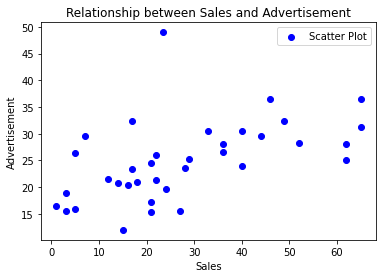

In [102]:
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Sales and Advertisement')
plt.xlabel('Sales')
plt.ylabel('Advertisement')
plt.legend(loc=1)
plt.show()

In [103]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

# Data Split

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Training

In [105]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
m = lm.coef_
c = lm.intercept_,
print("Estimated model slope, m:" , m)
print("Estimated model intercept, c:" , c)

Estimated model slope, m: [[0.18327538]]
Estimated model intercept, c: (array([19.9365533]),)


# Model Prediction with training and testing data

In [107]:
y_pred_train=lm.predict(X_train)
y_pred_test=lm.predict(X_test)

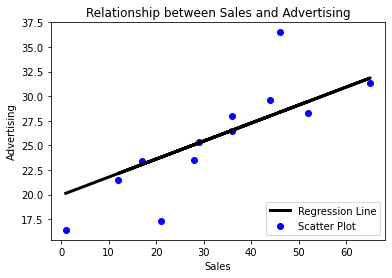

In [108]:
plt.scatter(X_test, y_test, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred_test, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

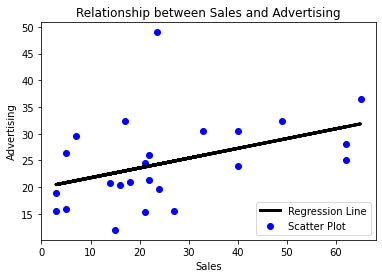

In [109]:
plt.scatter(X_train, y_train, color = 'blue', label='Scatter Plot')
plt.plot(X_train, y_pred_train, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

# Error Metrics

In [110]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_train, y_pred_train)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

Root mean square error 7.347179867332778
Mean square error 53.981052002940096
Mean absolute error 5.538264354168433


In [111]:
#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_test, y_pred_test)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Root mean square error 3.3090304341140193
Mean square error 10.949682413892814
Mean absolute error 2.146162327198711


# Residual Plot

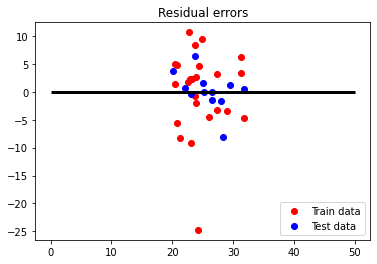

In [112]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

In [113]:

# Checking for Overfitting or Underfitting the data

print("Training set score:",lm.score(X_train,y_train))

print("Test set score:",lm.score(X_test,y_test))

Training set score: 0.17149241657209102
Test set score: 0.6358467898712759


#Save Model for Deploymnet

In [114]:
import pickle
# Save the model
filename = 'model.pkl'
pickle.dump(lm, open(filename, 'wb'))

#Deployment

In [115]:
user_ip=input('enter advertising cost')
adv=np.array(float(user_ip))
adv=adv.reshape(-1,1)
sales=lm.predict(adv)
print('Advertising cost of the month',float(user_ip))
print('Sales cost of the month',sales)

enter advertising cost25
Advertising cost of the month 25.0
Sales cost of the month [[24.51843779]]


In [116]:
model = pickle.load(open('model.pkl', 'rb'))
user_ip=input('enter advertising cost')
adv=np.array(float(user_ip))
adv=adv.reshape(-1,1)
prediction = model.predict(adv)
result = prediction[0]
print('Advertising cost of the month',float(user_ip))
print('Sales cost of the month',result)

enter advertising cost25
Advertising cost of the month 25.0
Sales cost of the month [24.51843779]
